The code has been loaded in a dataframe to checkout the features

In [2]:
import pandas as pd
import numpy as np
# read data from a csv file
# and save to df
df = pd.read_csv('data_reg.csv')
print(df.head())
print(df.info())

         x1        x2         y
0  0.548814  0.311796  0.547818
1  0.715189  0.696343  0.576032
2  0.602763  0.377752  0.113475
3  0.544883  0.179604  1.072286
4  0.423655  0.024679  0.624525
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   y       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB
None


As shown in the cell above, The data are all float numbers. The data contains 2 input features x1, x2 and one target feature which is also a float "y"

The data will be splitted into training, validation and testing sets. The three sets were plotted using a scatter plot.

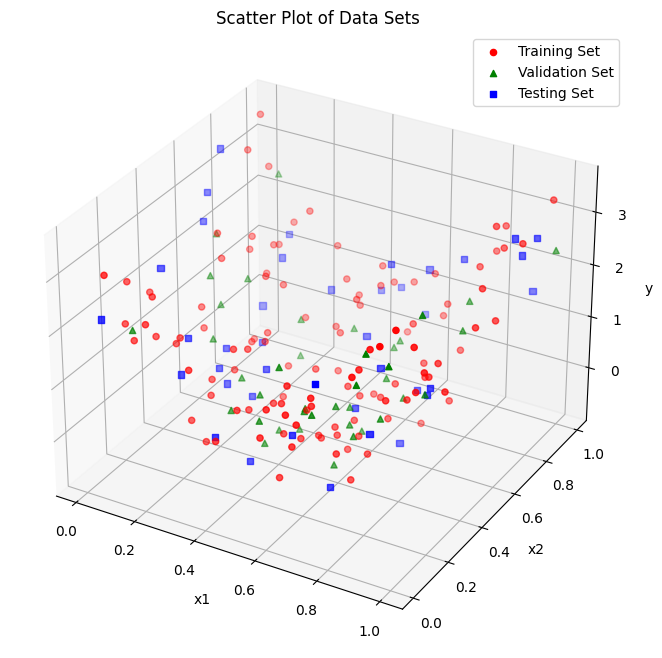

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Split the data into training, validation, and testing sets
training_set = df.iloc[:120] # first 120 rows
validation_set = df.iloc[120:160] # next 40 rows
testing_set = df.iloc[160:] # last 40 rows

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training set
ax.scatter(training_set['x1'], training_set['x2'], training_set['y'], c='r', marker='o', label='Training Set')

# Scatter plot for validation set
ax.scatter(validation_set['x1'], validation_set['x2'], validation_set['y'], c='g', marker='^', label='Validation Set')

# Scatter plot for testing set
ax.scatter(testing_set['x1'], testing_set['x2'], testing_set['y'], c='b', marker='s', label='Testing Set')

# Set labels and legend
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Scatter Plot of Data Sets')
ax.legend()

# Show the plot
plt.show()

As shown in the figure, the distribution of the data was shown in a 3d way.

In the next cell, the polynomial degrees of the polynomial regression were changed using a for loop. Each model was showed and plotted below. Note that the polynomial degrees change from 1 to 10. The MSE of each model was inserted to an array to plot the curve of validation error vs polynomial degree curve.

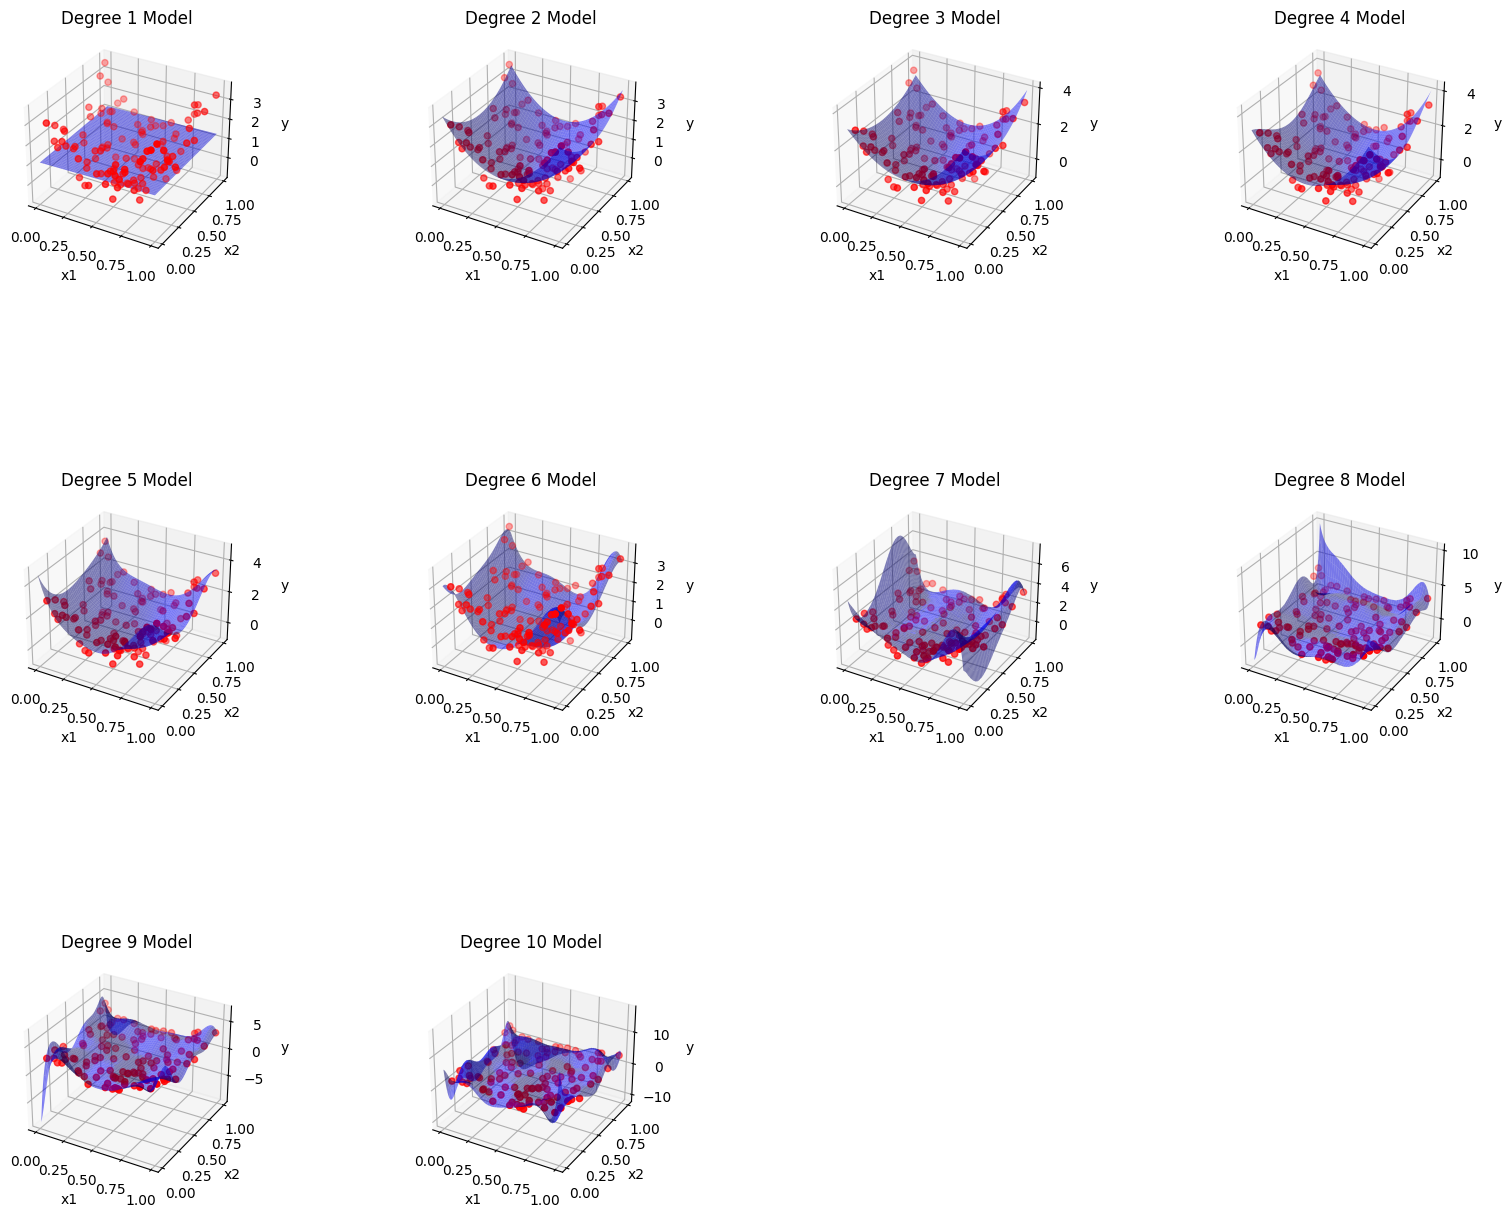

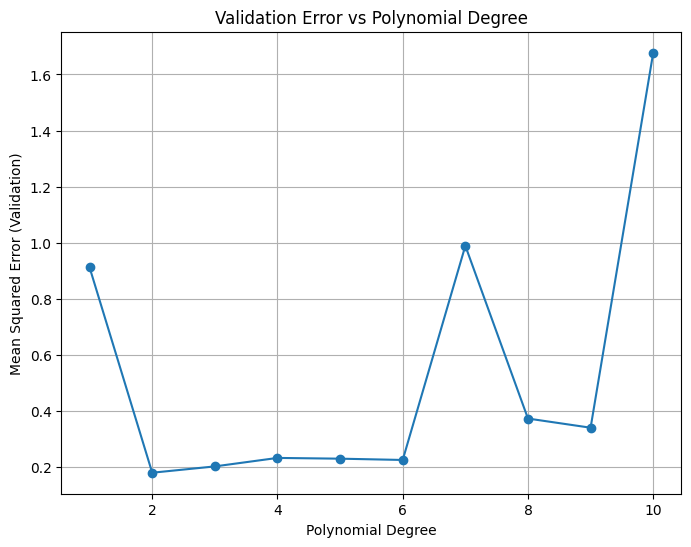

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract features and target from the training set
X_train = training_set[['x1', 'x2']].values
y_train = training_set['y'].values

# Extract features and target from the validation set
X_validation = validation_set[['x1', 'x2']].values
y_validation = validation_set['y'].values

# Set the degrees for polynomial regression
degrees = np.arange(1, 11)
validation_errors = []

# Create a figure for the plots
fig = plt.figure(figsize=(20, 15))

# Perform polynomial regression for each degree
for i, degree in enumerate(degrees, 1):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_validation_poly = poly.transform(X_validation)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on validation set
    y_validation_pred = model.predict(X_validation_poly)

    # Calculate validation error (mean squared error)
    validation_error = mean_squared_error(y_validation, y_validation_pred)
    validation_errors.append(validation_error)

    # Plot the surface of the learned function alongside the training examples
    ax = fig.add_subplot(3, 4, i, projection='3d')

    # Scatter plot for training set
    surf = ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o', label='Training Set')

    # Plot the surface of the learned function
    x1_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    x2_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
    X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    X_mesh_poly = poly.transform(X_mesh)
    y_mesh_pred = model.predict(X_mesh_poly)
    ax.plot_surface(x1_mesh, x2_mesh, y_mesh_pred.reshape(x1_mesh.shape), color='b', alpha=0.5, label=f'Degree {degree} Model')

    # Set labels and legend
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title(f'Degree {degree} Model')

plt.subplots_adjust(hspace=1)
plt.show()


# Plot the validation error vs polynomial degree curve
plt.figure(figsize=(8, 6))
plt.plot(degrees, validation_errors, marker='o')
plt.title('Validation Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (Validation)')
plt.grid(True)
plt.show()

As shown in the plots and the curve above, The validation error was high when the degree of the polynomial is low which indicates an underfitting. but as the degree of the polynomial increased it reached its peak when the degree is 10 (it would increase more if the degree is more than 10) which indicates that the model was well fitted on the training data that it had high MSE in the testing and validation data which indicates an overfitting.

In the next cell, Ridge regression was applied on the training set to fit a polynomial of degree 8. The Ridge was used from the sklearn library. First, the degree of the poly was initialized as 8. The alpha values that were given in the question were put in an array. A loop was made to apply the polynomial regression with the given degree then apply the ridge regression with looping on the alpha values array and then check for MSE to choose the best values of alpha that gives the lowest MSE.

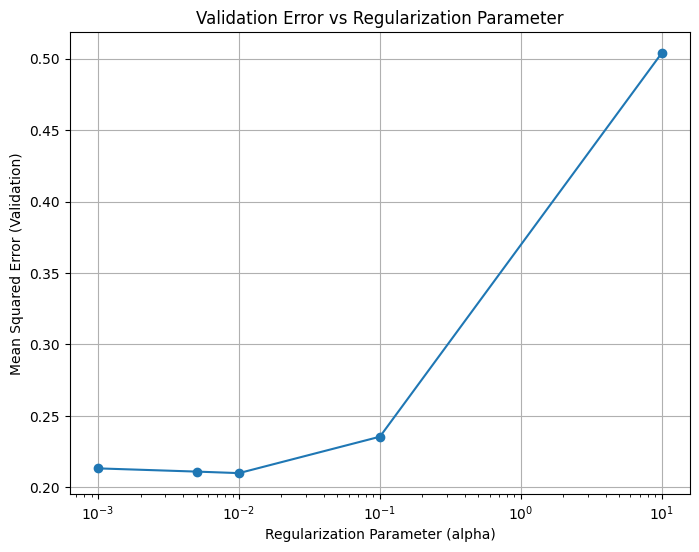

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Set the degree for polynomial regression
degree = 8

# Set the regularization parameters to try
alpha_values = [0.001, 0.005, 0.01, 0.1, 10]

# Store MSE values for each alpha
mse_values = []

# Perform polynomial regression with Ridge for each alpha
for alpha in alpha_values:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_validation_poly = poly.transform(X_validation)

    # Fit Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, y_train)

    # Predict on validation set
    y_validation_pred = model.predict(X_validation_poly)

    # Calculate validation error (mean squared error)
    validation_error = mean_squared_error(y_validation, y_validation_pred)
    mse_values.append(validation_error)

# Plot the MSE on the validation set vs the regularization parameter
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, mse_values, marker='o')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('Validation Error vs Regularization Parameter')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Mean Squared Error (Validation)')
plt.grid(True)
plt.show()

After plotting the MSE vs ALPHA values. the figure showed that when the MSE decreases with the increase of alpha until it reaches a point where it increased in a fast way with the increase of alpha. Note that the model gave the best performance when alpha was 0.01 (10^-2).

In [9]:
####################################

PART TWO

In the Next Cell the data was splitted into training and testing samples. The logistecRegression was applied using the one provided from sklearn library. The decision boundry was drawn along with the data after applying the mode, The accuraccy was printed as well.

/home/root24/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/root24/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/root24/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/root24/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

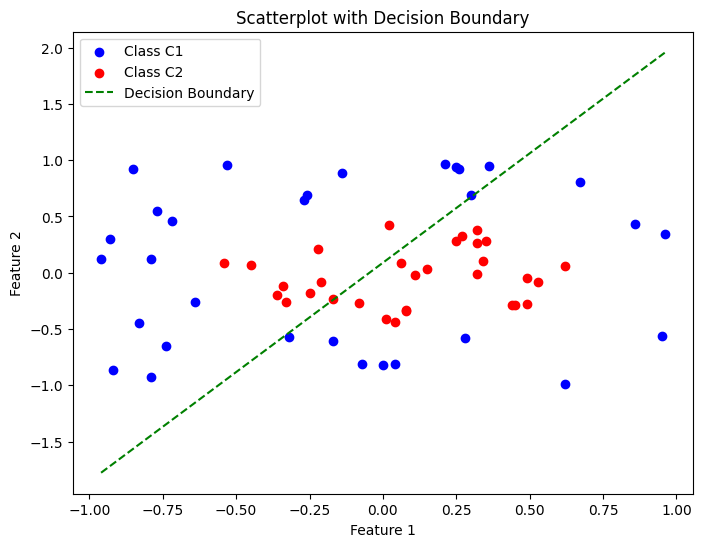

Training Accuracy: 0.66
Testing Accuracy: 0.68


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Load the training and testing datasets
train_data = pd.read_csv('train_cls.csv')
test_data = pd.read_csv('test_cls.csv')

# Separate features (X) and target variable (y) for training set
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# Separate features (X) and target variable (y) for testing set
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Initialize logistic regression model
model = LogisticRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Compute training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute testing accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Draw the decision boundary on a scatterplot of the training set
plt.figure(figsize=(8, 6))
    
# Scatter plot for the C1 class
plt.scatter(X_train[y_train == 'C1'].iloc[:, 0], X_train[y_train == 'C1'].iloc[:, 1], color='blue', label='Class C1')

# Scatter plot for the C2 class
plt.scatter(X_train[y_train == 'C2'].iloc[:, 0], X_train[y_train == 'C2'].iloc[:, 1], color='red', label='Class C2')

# Plot the decision boundary
coef = model.coef_[0]
intercept = model.intercept_
slope = -coef[0] / coef[1]
intercept = -intercept / coef[1]
decision_boundary_x = np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 100)
decision_boundary_y = slope * decision_boundary_x + intercept
plt.plot(decision_boundary_x, decision_boundary_y, linestyle='--', color='green', label='Decision Boundary')

plt.title('Scatterplot with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Display training and testing accuracy
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')


As shown in the figure above, There are lots of values from class C1 that crossed the decision boundry line which made the error too high. Also, some of class C2 samples crossed the boundary line in a way that made it hard to know which area represent C1 and which area represent C2. Note that the accuraccy of the linear logistech regression had low variance and a high bias on this dataset which indicates an underfitting.

In the cell below, The same method was applied but with a logistic regression with degree 2 to check the effect of increasing the degree level. A step size was initialized to 0.02 to create a mesh grid for the decision boundary (The spacing between points in the mesh grid that used to generate the decision boundary plot).

/home/root24/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/root24/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/root24/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/root24/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Sp

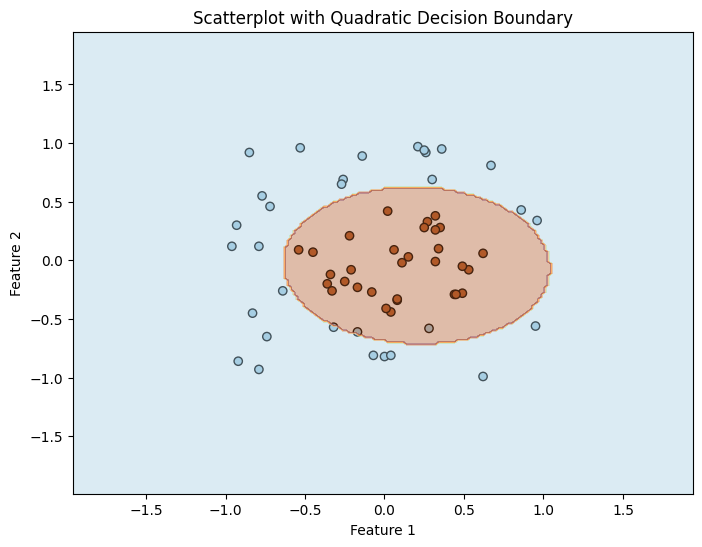

Training Accuracy (Quadratic): 0.97
Testing Accuracy (Quadratic): 0.95


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Use PolynomialFeatures to create quadratic features
degree = 2 
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize logistic regression model
model_poly = LogisticRegression()

# Fit the model on the training set with polynomial features
model_poly.fit(X_train_poly, y_train_encoded)

# Compute training accuracy
y_train_pred_poly = model_poly.predict(X_train_poly)
train_accuracy_poly = accuracy_score(y_train_encoded, y_train_pred_poly)

# Compute testing accuracy
y_test_pred_poly = model_poly.predict(X_test_poly)
test_accuracy_poly = accuracy_score(y_test_encoded, y_test_pred_poly)

# Draw the decision boundary on a scatterplot of the training set
plt.figure(figsize=(8, 6))

# Scatter plot for the positive class
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train_encoded, cmap=plt.cm.Paired, edgecolor='k')

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_poly = model_poly.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_poly = Z_poly.reshape(xx.shape)
plt.contourf(xx, yy, Z_poly, cmap=plt.cm.Paired, alpha=0.4)

plt.title('Scatterplot with Quadratic Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Display training and testing accuracy
print(f'Training Accuracy (Quadratic): {train_accuracy_poly:.2f}')
print(f'Testing Accuracy (Quadratic): {test_accuracy_poly:.2f}')

As shown in the figure above, the decision boundary of the higher degree had better performance than the previous linear model. The accuarracy of the testing data has became 0.95 which shows a great performance compared to the linear logistic regression.

Note that the contourf function was used to create a filled contour plot based on the predictions. This plot visualizes the decision boundary by filling different regions with different colors, representing the predicted classes.

Also, the target class was encoded using label encoder to get rid of the catagorical values "C1" , "C2" to become something numeric so the model can handle it.

In conclusion, the first model was underfitted on the data. The second model was well fitted since the testing and training accurracy did not vary a lot.